### 数据导入


In [1]:
# 选择需要的因子
indicators = [
    "macd", "bbi", "ad", "ama", "pdi","mdi", 'mom',"sar",
    "kdj", "rsi", "roc", "bias", "cci", "osc", "cmo", "apo", 'ao',
     "bopa", "mfi", "wr", 'tema', 'vhf', 'cmf', 'vris', 'k', 'd', 'ri', 'cvi','obv']

rolling_window = 252
contract = 'T' #可换为T、TL、TF

In [2]:
# 滚动窗口更新信号并应用
import os
import pandas as pd
# 设置文件路径
file_path = f'rolling_data_{contract}_{rolling_window}.csv'# 如果文件已存在，加载已保存的数据
rolling_signal = pd.read_csv(file_path)
rolling_signal['date'] = pd.to_datetime(rolling_signal.date)

file_path = f'signal_data_{contract}.csv'# 如果文件已存在，加载已保存的数据
signal_data = pd.read_csv(file_path)
signal_data['date'] = pd.to_datetime(signal_data.date)

In [3]:
rolling_signal

,date,close,high,low,open,volume,mom,cmo,apo,macd,...,d_condition,ri_value,ri_sign,ri_condition,cvi_value,cvi_sign,cvi_condition,obv_value,obv_sign,obv_condition
0,2015-03-20,97.090,97.960,96.530,96.900,3332.0,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-03-23,97.020,97.095,96.840,97.095,1386.0,NaN,-100.000000,NaN,-0.009697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-24,96.920,97.220,96.875,97.135,1380.0,NaN,-100.000000,NaN,-0.028621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-25,96.850,97.030,96.760,97.020,1234.0,NaN,-100.000000,NaN,-0.047509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-03-26,96.370,96.890,96.370,96.835,1073.0,NaN,-100.000000,NaN,-0.121764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2025-09-03,108.160,108.175,108.000,108.015,86857.0,0.305,20.000000,-0.19025,0.068473,...,cool,46.024096,1.0,cool,0.036827,1.0,cool,4607557.0,1.0,cool
2546,2025-09-04,108.260,108.320,108.215,108.245,83913.0,0.260,17.567568,-0.14650,0.105659,...,turn_warm,49.184149,1.0,cool,0.036877,1.0,cool,4691470.0,1.0,cool
2547,2025-09-05,107.950,108.240,107.885,108.200,92512.0,0.290,20.000000,-0.08300,0.081139,...,turn_warm,48.505747,1.0,cool,0.038969,1.0,cool,4598958.0,1.0,cool
2548,2025-09-08,107.865,107.920,107.795,107.860,79696.0,-0.085,-6.827309,-0.06000,0.052578,...,turn_warm,45.720721,1.0,cool,0.038376,1.0,cool,4519262.0,1.0,cool


In [4]:
merged_signal = rolling_signal.merge(
    signal_data[['date']+[signal for signal in signal_data.columns if 'signal' in signal]], 
    left_on='date', 
    right_on='date', 
    how='inner',  # 'inner' 保证只保留那些在两个 DataFrame 中都有的日期
    suffixes=('_c','_s')
)

#### 回测

************************************* cmo_sign *************************************


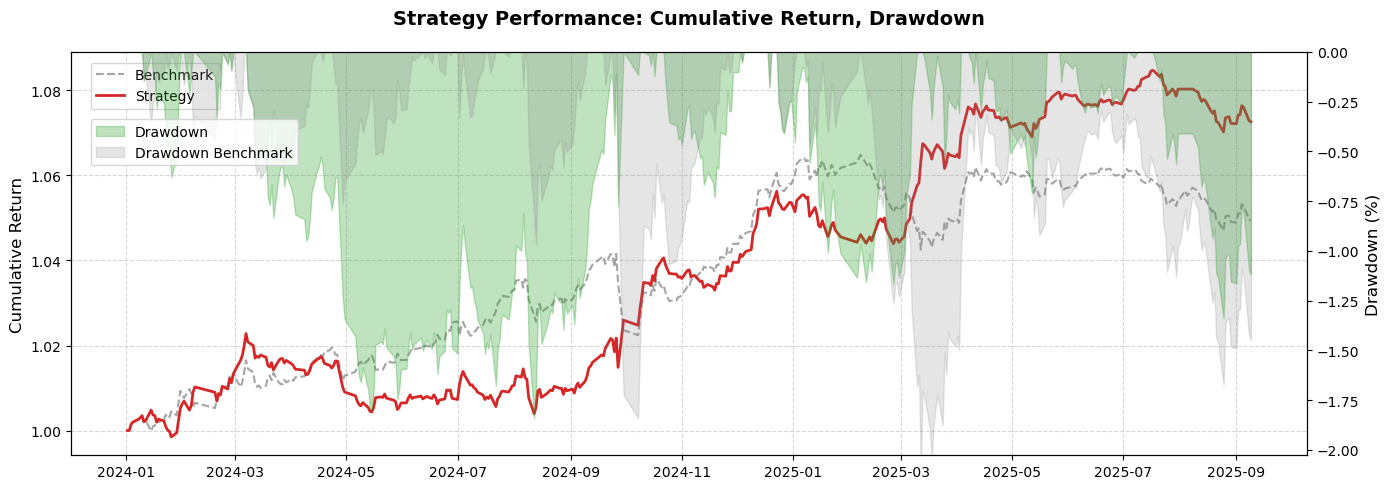

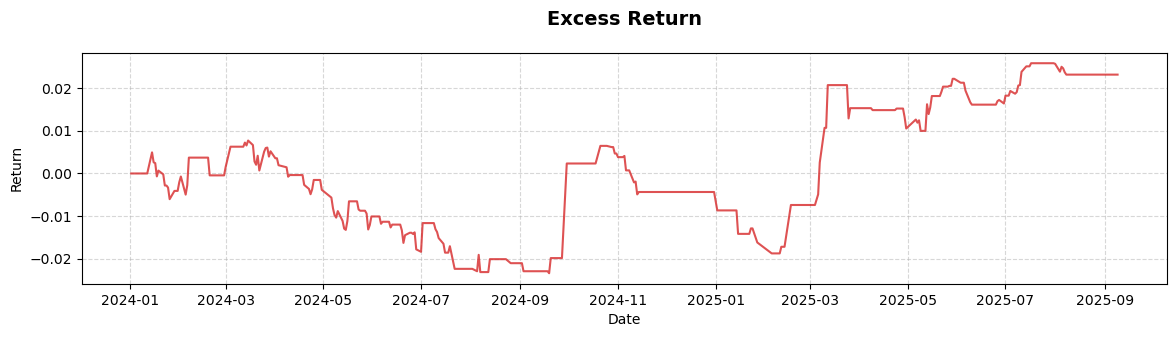

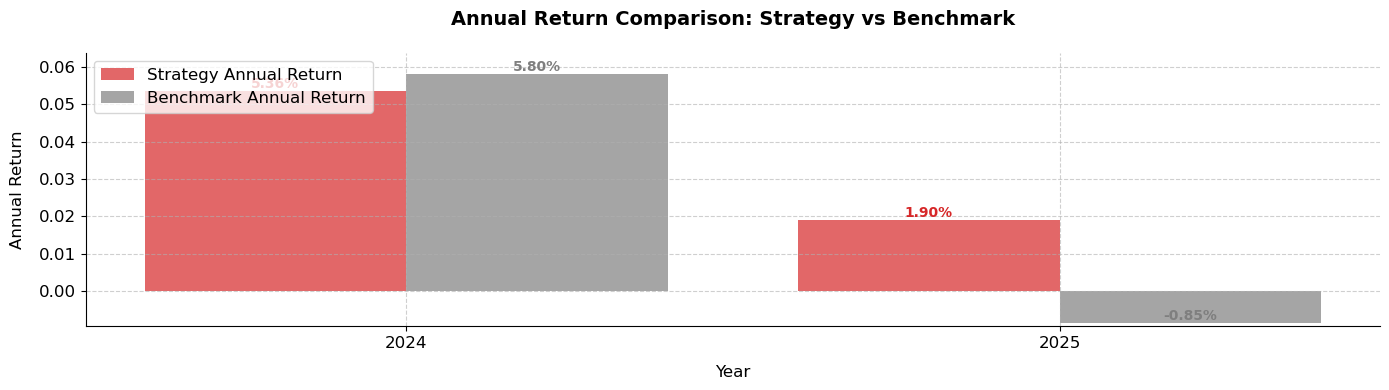

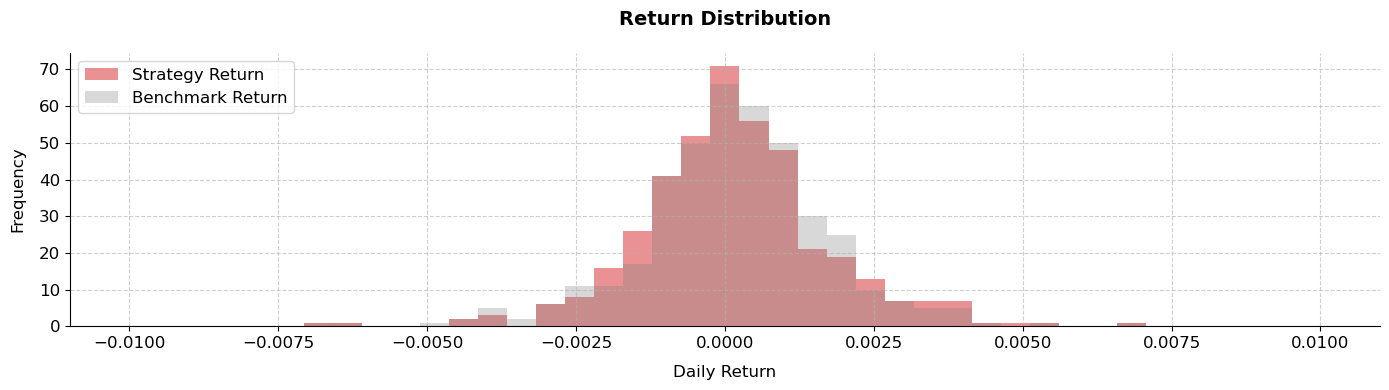

,Cummulative Return,Annual Return,Volatility,Sharpe Ratio,Max Drawdown,Calmar Ratio,Win Rate,Profit Factor
value,0.072624,0.044032,0.0266,1.655338,-0.018427,2.3896,0.542929,1.35248


,date,cmo_sign
0,2024-01-02,1.0
1,2024-01-03,1.0
2,2024-01-04,1.0
3,2024-01-05,1.0
4,2024-01-08,1.0
...,...,...
405,2025-09-03,1.0
406,2025-09-04,1.0
407,2025-09-05,1.0
408,2025-09-08,1.0


In [5]:

from Backtrader import StrategyBacktester
import datetime
import numpy as np
np.random.seed(0)

#设置日期
test_start_year =2024
test_end_year = 2025
for i in merged_signal.columns:
    if i in ['cmo_sign']:
        print('*************************************',i,'*************************************')
        backtester = StrategyBacktester(merged_signal, 
                                        start_year=test_start_year, 
                                        end_year=test_end_year, 
                                        signal_column=i,
                                        price_column='open', 
                                        initial_capital=1e9, 
                                        rf=0., 
                                        slippage=0.
                                        )

        # 执行回测
        backtester.run_backtest()

        # 可视化策略 vs 基准净值
        backtester.plot_pnl_curve()
        display(backtester.evaluate_performance())
        display(backtester.result[['date',i]])
